# Assignment 4

This assignment mainly enhances your **Model Fitting, Parameter Tuning, and Model Evaluation** Skills.
The total mark for this assignment is 75. Answer the questions in the code chunk and
fill up the missing part of the code. The tentative due date for this assignment
is 11:59 PM, Wednesday, March 9th. If I fall behind my schedule, extensions will be given.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## read the datset from your local drive
from google.colab import files
upload = files.upload()

Saving X_train_sc (1).csv to X_train_sc (1) (1).csv
Saving X_test_sc (1).csv to X_test_sc (1) (1).csv
Saving y_train (1).csv to y_train (1) (1).csv
Saving y_test (1).csv to y_test (1) (1).csv


In [ ]:
## Upload the cleaned dataset
## upload the dataset
import pandas as pd
X_train = pd.read_csv('X_train_sc (1).csv')
X_test = pd.read_csv('X_test_sc (1).csv')
y_train = pd.read_csv('y_train (1).csv')
y_test = pd.read_csv('y_test (1).csv')
print(X_train)


      Unnamed: 0  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0              0    0.116468     0.615582  0.214140    -0.087362    -0.534765   
1              1   -0.946286    -0.508092 -0.844471    -0.816429     2.210046   
2              2    2.374819    -2.025052 -1.441751    -1.545496    -0.534765   
3              3   -0.946286     0.166112  0.145052    -0.816429    -0.534765   
4              4    0.382156    -0.789011 -0.308201    -0.816429     0.380172   
...          ...         ...          ...       ...          ...          ...   
1155        1155   -0.946286     1.233603  0.736203     0.641705    -0.534765   
1156        1156   -0.946286    -0.058623  2.253359     2.099838    -0.534765   
1157        1157    1.710598     0.000000 -1.214706     0.641705    -0.534765   
1158        1158   -0.149221    -0.508092  0.225283    -0.816429     0.380172   
1159        1159    0.116468     0.053745 -0.343024    -0.087362     0.380172   

      YearBuilt  YearRemodA

In [ ]:
## Fit a Lasso Regression
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

R2 score (train) :  0.3853
R2 score (test) :  0.2919
RMSE (train) :  286.3914
RMSE (test) :  307.2187


In [ ]:
### What is wrong with this piece of code?
print(y_train_pred)
print(y_train)
print(y_train_pred[:, 1])
print(y_train.iloc[:,1])

[[951.30492226  11.99605433]
 [775.00397107  11.90040773]
 [444.04267693  11.62717438]
 ...
 [447.2794783   12.15272144]
 [735.49018388  11.8047289 ]
 [696.55961125  11.97156542]]
      Unnamed: 0  SalePrice
0            624  12.014609
1            592  11.835009
2             48  11.635143
3           1070  11.813030
4           1234  11.775290
...          ...        ...
1155         805  12.335696
1156          53  12.860999
1157         351  12.154779
1158          79  11.608236
1159         795  12.049419

[1160 rows x 2 columns]
[11.99605433 11.90040773 11.62717438 ... 12.15272144 11.8047289
 11.97156542]
0       12.014609
1       11.835009
2       11.635143
3       11.813030
4       11.775290
          ...    
1155    12.335696
1156    12.860999
1157    12.154779
1158    11.608236
1159    12.049419
Name: SalePrice, Length: 1160, dtype: float64


In [ ]:
### ToDo################################### NEW CODE FROM MODULES
### 3 points
### How to fix the Model evaluation part
### Model evaluation
### Fill out the code below
y_train = y_train.iloc[:, 1]
y_train_pred = y_train_pred[:, 1]
y_test = y_test.iloc[:, 1]
y_test_pred = y_test_pred[:, 1]

print(y_train_pred)
print(y_train)
print(y_test_pred)
print(y_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

[11.99605433 11.90040773 11.62717438 ... 12.15272144 11.8047289
 11.97156542]
0       12.014609
1       11.835009
2       11.635143
3       11.813030
4       11.775290
          ...    
1155    12.335696
1156    12.860999
1157    12.154779
1158    11.608236
1159    12.049419
Name: SalePrice, Length: 1160, dtype: float64
[11.88848386 12.3646035  11.93481803 11.75977225 11.94132777 11.71948358
 11.70147378 12.01704953 11.97979634 11.87472108 12.10989559 11.89950229
 12.35256506 12.19335452 11.16796044 11.97842997 12.55249021 11.93341075
 11.81950085 11.81672712 11.81647146 12.02346376 11.73626581 12.1340182
 11.60527101 11.92434972 12.13254993 12.20099094 12.04075055 12.14422579
 11.65499158 12.20437065 11.97781612 12.23211437 11.97916872 12.13444222
 11.81588021 12.13422071 11.8941952  12.06028513 12.34062926 11.82525475
 11.78777239 12.32735289 11.92774365 12.23385379 11.90582182 12.49903395
 12.1520619  11.71045798 11.77573028 11.82569038 11.80709098 11.77523582
 11.89965203 12.574017

In [ ]:
### What if I would like to set alpha=0.00125?
##### ToDo##############################################################
#### 6 points
#### fill out the code below
### fit a new lasso model
### fit it with X_train and y_train
### make predictions for the training set and testing set
### Perform mdoel evaluation using both training lables and testing labels
### using both r2_score and rmse

from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.00125)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))


R2 score (train) :  0.9092
R2 score (test) :  0.8923
RMSE (train) :  0.1204
RMSE (test) :  0.1308


In [ ]:
### What if I would like to set alpha=0.5?
##### ToDo##############################################################
#### 6 points
### fill out the code below
### fit a new lasso model
### fit it with X_train and y_train
### make predictions for the training set and testing set
### Perform mdoel evaluation using both training lables and testing labels
### using both r2_score and rmse

from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))


R2 score (train) :  0.0001
R2 score (test) :  -0.0017
RMSE (train) :  0.3995
RMSE (test) :  0.3988


In [ ]:
###################################################################
### ToDO ##########################################################
## 15 points
### Hold-out cross-validation
###################################################################
### If I want to check the effect of different values of the tuning parameter
### in the LASSO penalty on the prediction performance, write a function
### that takes a sequence of alpha values as input and returns the result of R2
### score and RMSE of y_train and y_test
import numpy as np

## Objectives of writing functions, reduce repetitive labours and
## avoid copy paste error
def ModelTrainAndEvaluaion(alphaValues, xtrain, xtest, ytrain, ytest):
    """
    Parameters:

    -alphaValues: a vector of different tuning parameter values
    -xtrain: the training dataset
    -xtest: the testing set
    -ytrain: target var for training set
    -ytest: target var for testing set

    Output:
    returns a dictionary that stores the r2, rmse of the training and
    testing set respectively. Choose a dictionary data structure to
    save the result
    """

    ##########Define Data Structures ##################
    #### Define data structures to store your results
    ## first, get the number of different values

    num = len(alphaValues)
    ## define data structures
    r2train = np.zeros(num)
    r2test = np.zeros(num)
    rmsetrain = np.zeros(num)
    rmsetest = np.zeros(num)

# np.zeros function defines a vector of however many zeros you want, in this case
# it is defining the number of zeros to the num variable we created

    #### Model fitting and evaluation with diffferent tuning parameters

    for i in range(num):
      model = Lasso(alpha = alphaValues[i])
      model.fit(xtrain, ytrain)
      y_train_pred = model.predict(xtrain)
      y_test_pred = model.predict(xtest)

      #model evaluation
      r2train[i] = round(r2_score(y_train,y_train_pred),4)
      r2test[i] = round(r2_score(y_train,y_train_pred),4)
      rmsetrain[i] = round(r2_score(y_train,y_train_pred),4)
      rmsetest[i] = round(r2_score(y_train,y_train_pred),4)

    result = dict()
    result['r2train'] = r2train
    result['r2test'] = r2test
    result['rmsetrain'] = rmsetrain
    result['rmsetest'] = rmsetest
    return result


### Example usage of this function
alphaValues = [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]
result = ModelTrainAndEvaluaion(alphaValues, X_train, X_test, y_train, y_test)
print(result['r2test'])
print(result['rmsetest'])

[9.104e-01 9.103e-01 9.099e-01 9.096e-01 9.094e-01 9.092e-01 9.077e-01
 9.034e-01 8.931e-01 6.840e-01 1.000e-04]
[9.104e-01 9.103e-01 9.099e-01 9.096e-01 9.094e-01 9.092e-01 9.077e-01
 9.034e-01 8.931e-01 6.840e-01 1.000e-04]


In [ ]:
###### ToDO################################################
##### 3 points

### Model selection
### How to choose the best tunning parameter?
import numpy as np
rmseValues = result['rmsetest']
## find the minimum value of the rmse
print(np.min(result['rmsetest']))

## find the index of the minimum rmse values
# axis = 0, refers to a row, axis = 1, refers to a column
minInd = np.argmin(rmseValues, axis=0)

## using this index and find the corresponding alpha value
bestAlpha = alphaValues[minInd]
print(bestAlpha)


0.0001
1


In [ ]:
######################################################
### ToDO #############################################
### 10 points ########################################
### Write the previous computations into a function
######################################################
## Can you change this into a function
## with alphaValues and rmseValues as input parameters
## return the minimum rmse value,
##        the index of the minimum rmse value
##      the corresponding alpha value
def tuningParamSelection(alphaValues, rmseValues):
    """
    Parameters:

    -rmseValues: a list or an numpy array of rmse values
    -alphaValues: a vector of different tuning parameter values

    Output:
    returns a dictionary that stores index of the minimum
    rmse and the corresponding alpha value that has the min rmse
    save the result in a dictionary and return it

    """
# Do as HOMEWORK:

    rmseValues = result['rmsetest']

    ## find the minimum value of the rmse
    print(np.min(result['rmsetest']))
    ## find the index of the minimum rmse values
    minInd = np.argmin(rmseValues, axis=0)

    ## using this index and find the corresponding alpha value
    bestAlpha = alphaValues[minInd]

    ## save minInd and bestAlpha into a dictionary

    result = dict()
    result['minInd'] = minInd
    result['bestAlpha'] = bestAlpha
    return result



### Example usage of this function
    alphaValues = [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]
    result = tuningParamSelection(alphaValues, rmseValues)
print(result)

{'minInd': 10, 'bestAlpha': 1}


In [ ]:
##############################################################
### Todo #####################################################
### 10 points
### K fold cross-validation

##############################################################

folds = KFold(n_splits = 5)

params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}


model = Lasso()

# defines model: could be model=Ridge()

### GridSearch and Model training
model_cv = GridSearchCV(estimator = model,
                              param_grid = params,
                              scoring= 'r2',
                              cv = folds,
                              return_train_score=True,
                              verbose = 1)

### use model_cv to fit with X_train and y_train
model_cv.fit(X_train,y_train)

### get the best alpha
alpha=model_cv.best_params_["alpha"]
print("Optimum alpha for %s is %f" %(model, alpha))

### get the best estimator from model_cv and set it as final_model

final_model=model_cv.best_estimator_

### use final_model to fit with X_train and y_train

final_model.fit(X_train,y_train)


## Model Prediction using X_train and X_test respectively

y_train_pred=final_model.predict(X_train)
y_test_pred=final_model.predict(X_test)

# Model Evaluation

print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

## save the cross validation results into a data frame

cvResults = pd.DataFrame(model_cv.cv_results_)
cvResults.head(5)

cvResults['param_alpha'] = cvResults['param_alpha'].astype('float32')

print(cvResults)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for Lasso() is 0.002500
R2 score (train) :  0.9077
R2 score (test) :  0.8935
RMSE (train) :  0.1214
RMSE (test) :  0.1301
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.054812      0.022602         0.008966        0.002351      0.00010   
1        0.050190      0.016264         0.010134        0.001196      0.00025   
2        0.041695      0.010701         0.009561        0.000719      0.00050   
3        0.034004      0.012133         0.010583        0.001894      0.00065   
4        0.030344      0.007220         0.009587        0.000838      0.00100   
5        0.024103      0.003157         0.011788        0.001763      0.00125   
6        0.021453      0.001888         0.011018        0.002133      0.00250   
7        0.023680      0.002118         0.011158        0.001400      0.00500   
8        0.024214      0.004268         0.010781        0.001955      0.01

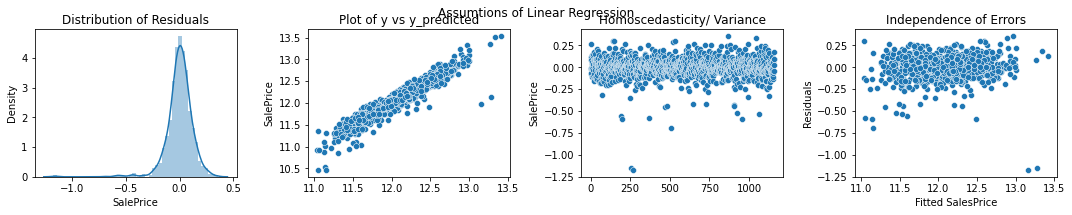

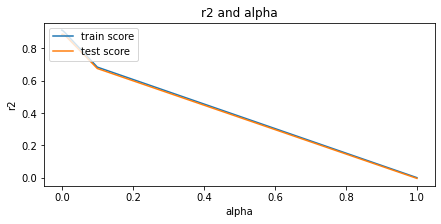

In [ ]:
### Model Assumptions and Diagnostics
#######ToDO####################################################
## 5 points
fig, axes = plt.subplots(1, 4, figsize=(15,3))

## Check if the distribution of the residual looks like a Normal distribution
## (bell shape)
fig.suptitle('Assumtions of Linear Regression')
sns.distplot(y_train-y_train_pred, ax = axes[0])
axes[0].set_title('Distribution of Residuals')

### Check the linearity assumption using the observed-vs-predicted values
sns.scatterplot( y_train_pred, y_train  , ax = axes[1])
axes[1].set_title('Plot of y vs y_predicted')

### Check equal variances
sns.scatterplot(X_train.index,(y_train-y_train_pred),ax = axes[2])
axes[2].set_title('Homoscedasticity/ Variance')
plt.tight_layout()

### Check independence of errors
sns.scatterplot(y_train_pred,(y_train-y_train_pred),ax = axes[3])
axes[3].set_title('Independence of Errors')
plt.ylabel("Residuals")
plt.xlabel("Fitted SalesPrice")
plt.tight_layout()

### Check for overfitting

fig = plt.figure(figsize=(7,3))

## use plt.plot to draw cvResults['param_alpha'] as x axis
## and use cvResults['mean_train_score'] as y axis

plt.plot(cvResults['param_alpha'],cvResults['mean_train_score'])

## use plt.plot to draw cvResults['param_alpha'] as x axis
## and use cvResults['mean_test_score'] as y axis

plt.plot(cvResults['param_alpha'],cvResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
###### Combine the K-fold cross validation and model diagnostics
###### into a function.
###### The input of the function should include 1. model
###### For example, model can be Lasso() or Ridge()
###### 2. params should be a dictionary of the candidate alpha values
###### 3. dataset, xtrain, xtest ytrain, ytest
###### scoring criterion should be r2
###### return the final model selected by cross validation that has
###### the largest r2 value
# hint : look at k fold cross validation example in code above
### ToDO ###############################################################
### 15 points
def ModelTrainAndEvaluaion(model, params, xtrain, xtest, ytrain, ytest):
  folds = KFold(n_splits = 5)
  model_cv = GridSearchCV(estimator = model,
                              param_grid = params,
                              scoring= 'r2',
                              cv = folds,
                              return_train_score=True,
                              verbose = 1)

### use model_cv to fit with X_train and y_train
  model_cv.fit(X_train,y_train)

### get the best alpha
  alpha=model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))

### get the best estimator from model_cv and set it as final_model

  final_model=model_cv.best_estimator_

### use final_model to fit with X_train and y_train

  final_model.fit(X_train,y_train)

## Model Prediction using X_train and X_test respectively

  y_train_pred=final_model.predict(X_train)
  y_test_pred=final_model.predict(X_test)

# Model Evaluation

  print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
  print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
  print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
  print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

  return final_model

## save the cross validation results into a data frame

  cvResults = pd.DataFrame(model_cv.cv_results_)
  cvResults.head(5)

  cvResults['param_alpha'] = cvResults['param_alpha'].astype('float32')

  print(cvResults)



####  example use of this function
params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}
finalModel = ModelTrainAndEvaluaion(Lasso(), params=params,
                                    xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test)


Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for Lasso() is 0.002500
R2 score (train) :  0.9077
R2 score (test) :  0.8935
RMSE (train) :  0.1214
RMSE (test) :  0.1301


In [ ]:
#### Use the function ModelTrainAndEvaluaion to fit a ridge regression with the
### following parameters params
params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                        9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]}

################################################################################
### ToDO
### 2 points
### fill out the code here
ridge = ModelTrainAndEvaluaion(Ridge(), params,
                               X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 29 candidates, totalling 145 fits
Optimum alpha for Ridge() is 50.000000
R2 score (train) :  0.9089
R2 score (test) :  0.8897
RMSE (train) :  0.1206
RMSE (test) :  0.1323
